## Import the necessary libraries

In [40]:
import sys

from scipy.optimize import curve_fit

sys.path.append("../../src")

from relaxnmr.core import T1Functions

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

## specify path to the data file and ensure that "\\\\" is appended to the end of the path

 - create an instance t1 of T1Functions

In [34]:
filepath = r"..\..\data\T1_data\1\\"

t1 = T1Functions(filepath)

## Read and convert Bruker NMR data to NMRPipe and CSDM formats: read_and_convert_bruker_data.

The function automatically detects and loads the variable delay list (vdlist, vplist, vclist) used in the experiment.

It returns a tuple containing three elements: a list of 1D NMR (spectra), the variable delay list (vd_list), and the complete dataset in CSDM format (csdm_ds)

In [35]:
spectra, vd_list, csdm_ds = t1.read_and_convert_bruker_data(filepath)

## Process the returned 1D NMR spectra
 - apply the Gaussian apodisation (fwhm)
 - zero-filling for increased digital resolution (zero_fill_factor)
 - 0th order phase correction (ph0)
 - 1st order phase correction (ph1) -- this phase correction is a bit nuanced and so far, a value of 0 - 0.6 ° has worked quite well
   - Here we will different ph1 values to see how this phasing works, showing the users how to pick a good value of ph1

In [45]:
df = pd.DataFrame(np.arange(0, 0.6, 0.01), columns=['ph1 Values'])

print(df.head())

   ph1 Values
0        0.00
1        0.01
2        0.02
3        0.03
4        0.04


So, we will be using 59 values of ph1 to phase the spectrum, and you will be the judge of how well the phase correction works.

In [36]:
phased_spectra = []
for i, spectrum in enumerate(spectra):
    if i == 14:
        for ph1 in np.arange(0, 0.6, 0.01):
            exp_spectrum = t1.process_spectrum(spectrum, fwhm = "500 Hz", zero_fill_factor = 10, ph0=50, ph1=ph1)
            phased_spectra.append(exp_spectrum)

In [38]:
trapz_ints = []
simps_ints = []
x_regions = []
y_regions = []
int_uncs = []

for i, exp_spectrum in enumerate(phased_spectra):
    trapz_int, simps_int, x_region, y_region, int_unc = t1.integrate_spectrum_region(exp_spectrum, ppm_start=500, ppm_end=650)
    trapz_ints.append(trapz_int)
    simps_ints.append(simps_int)
    x_regions.append(x_region)
    y_regions.append(y_region)
    int_uncs.append(int_unc)

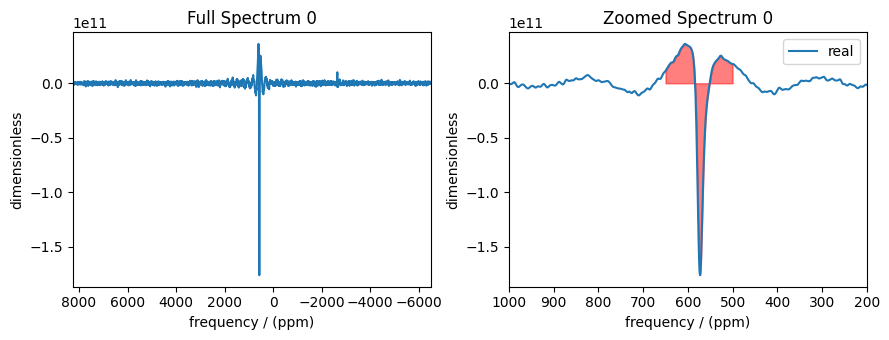

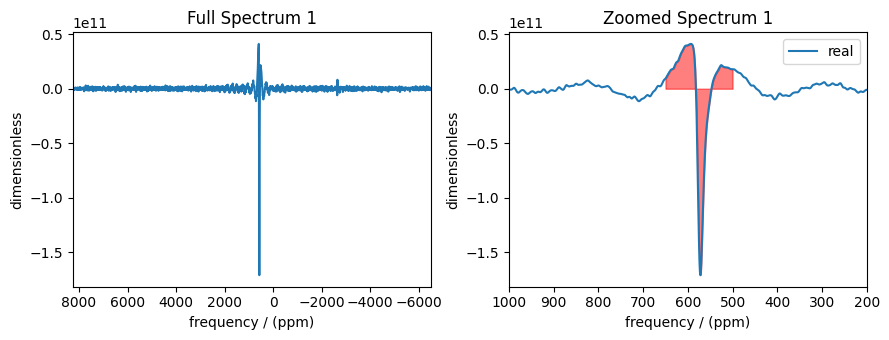

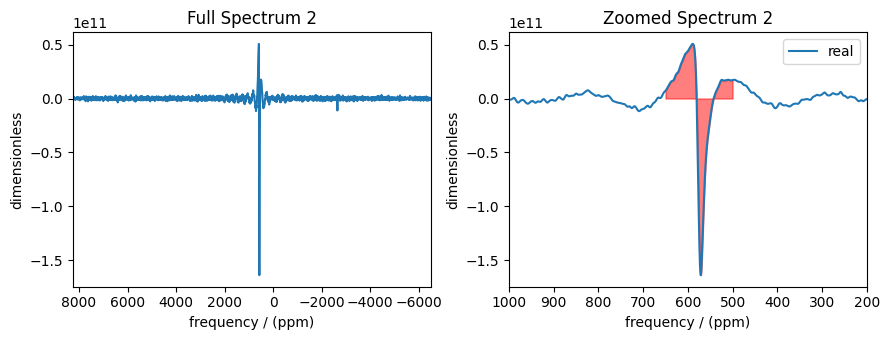

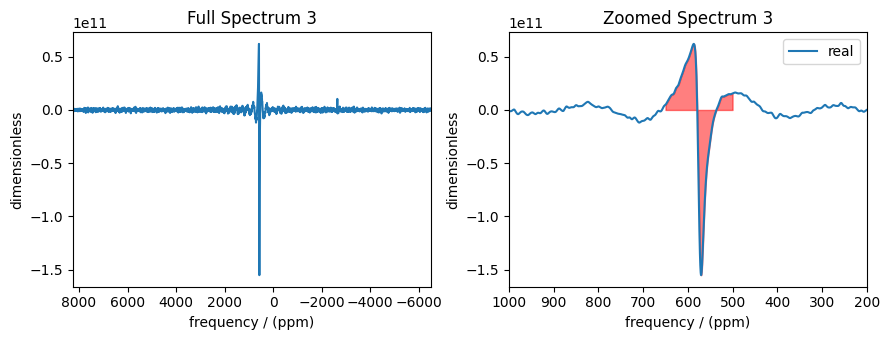

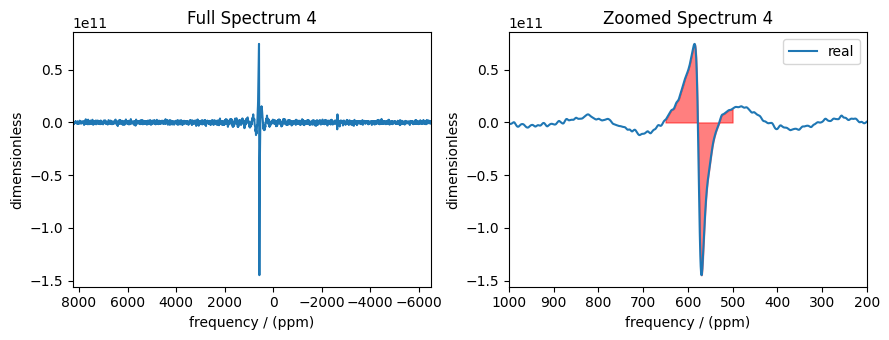

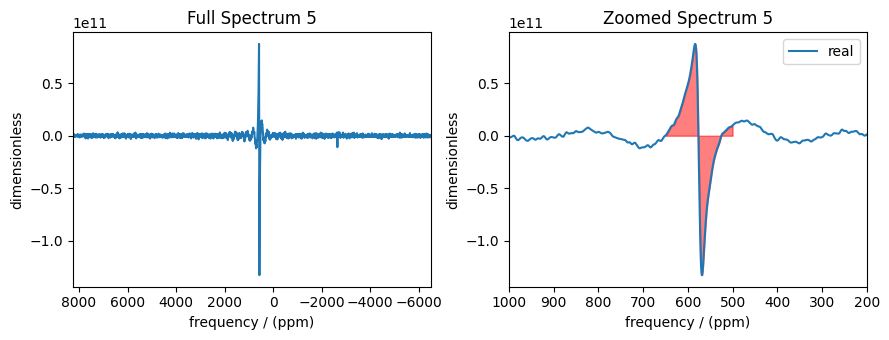

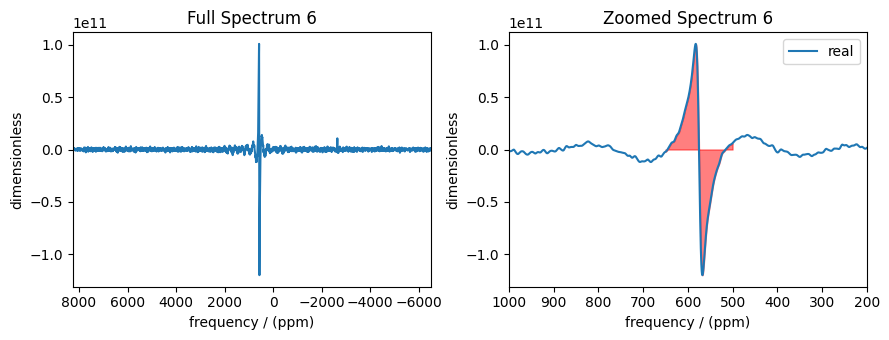

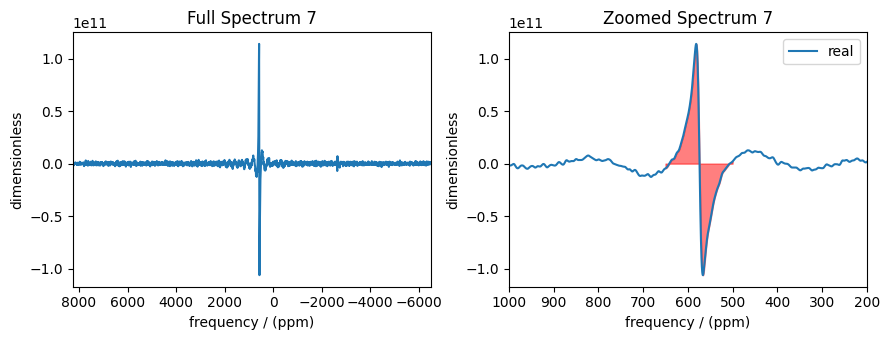

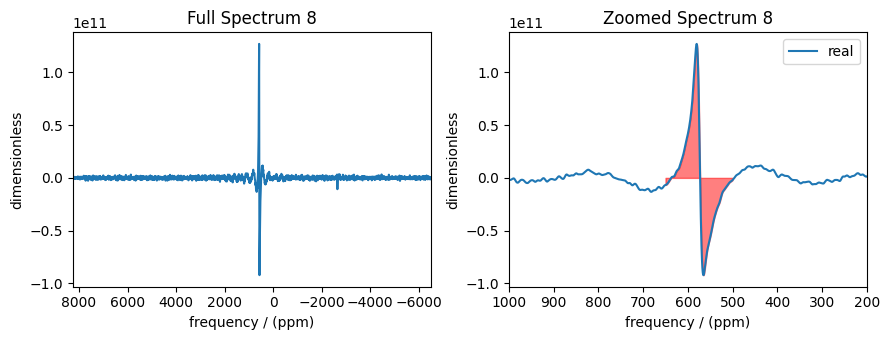

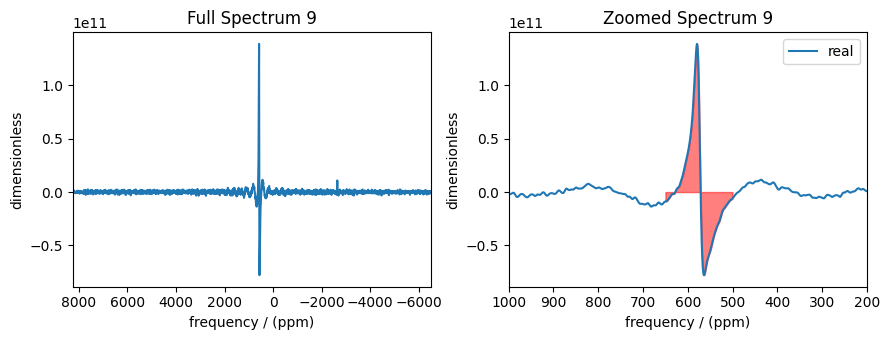

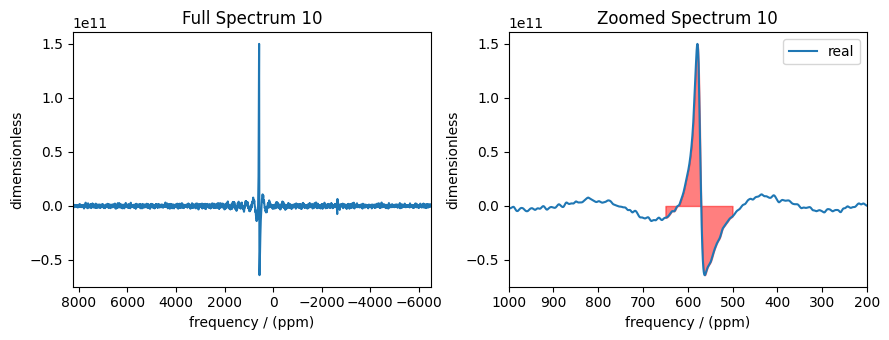

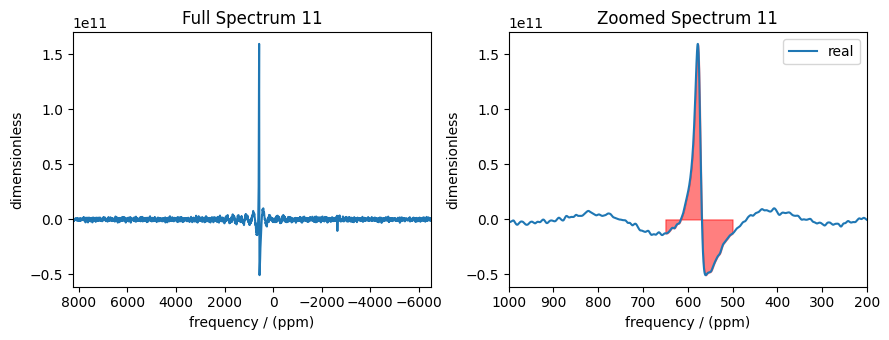

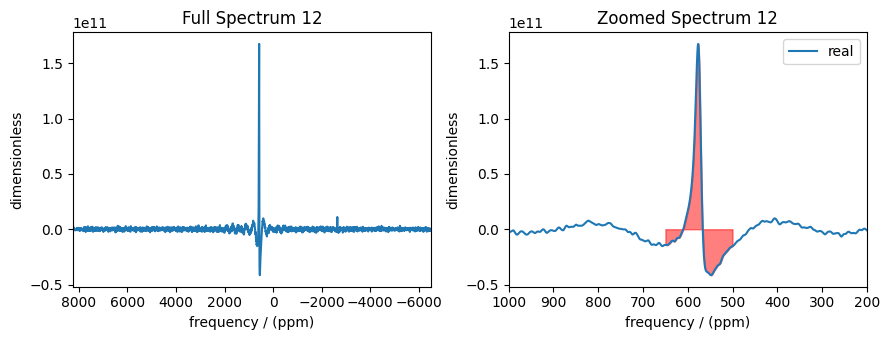

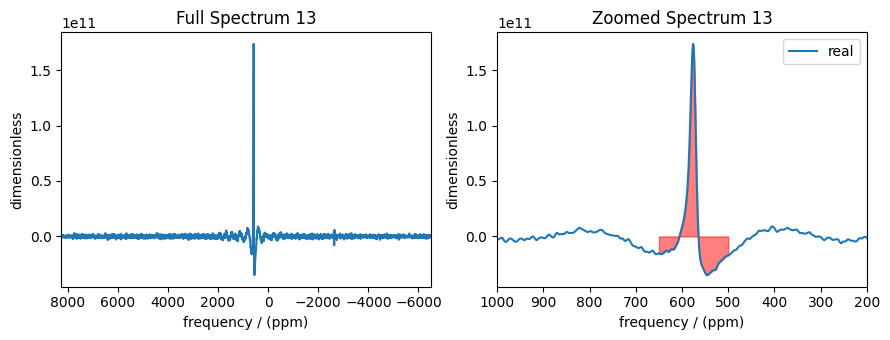

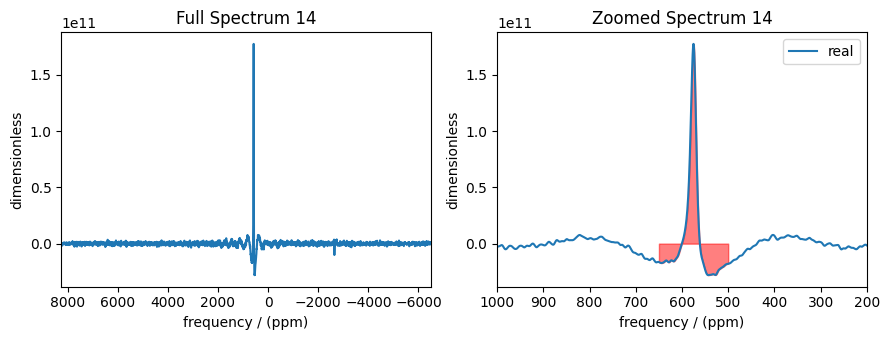

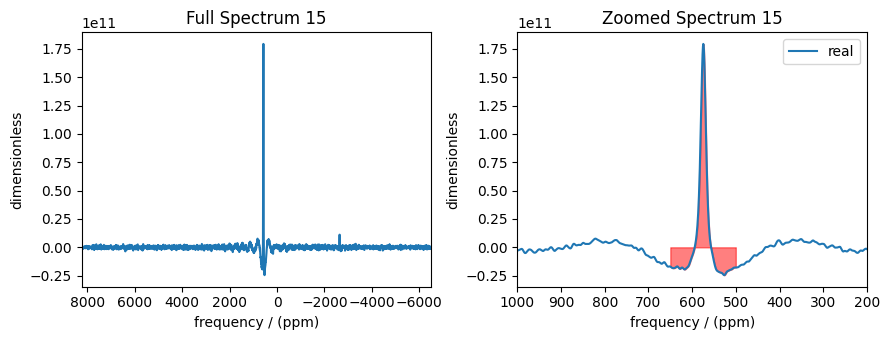

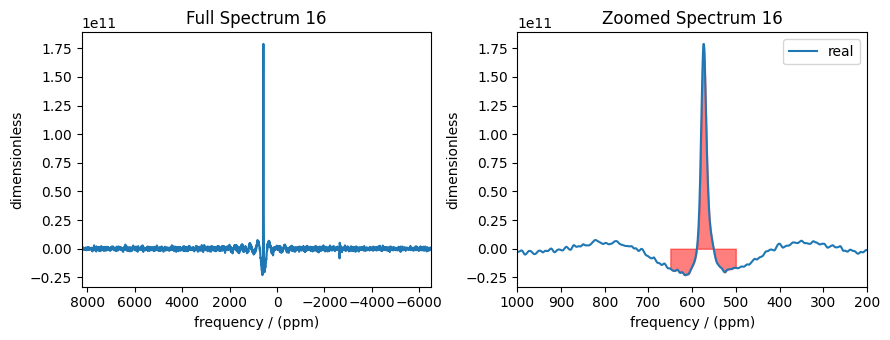

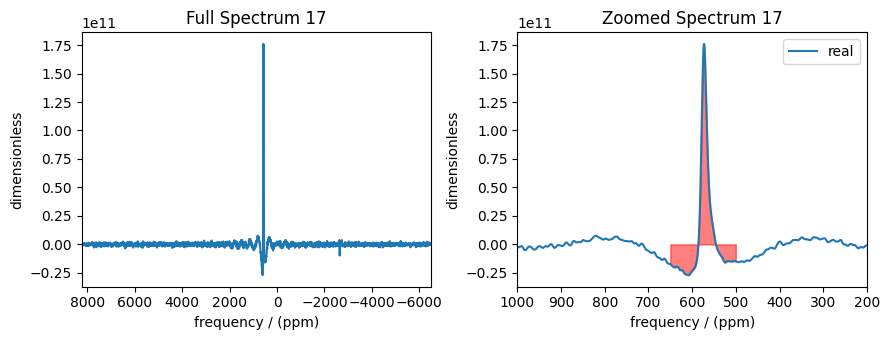

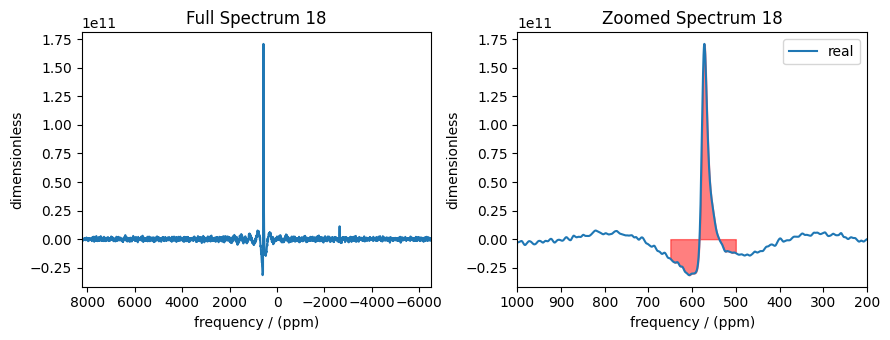

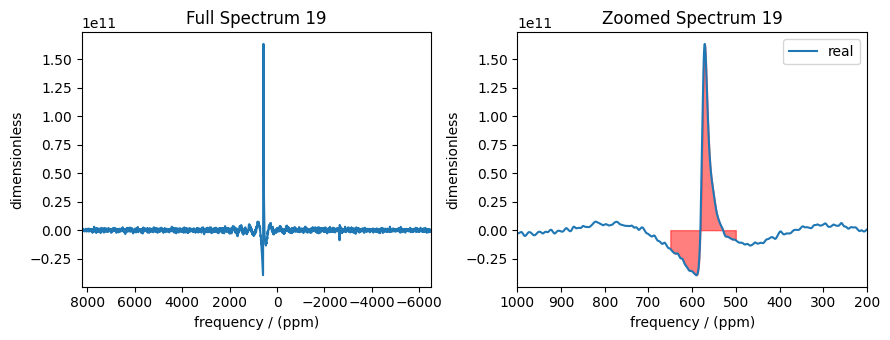

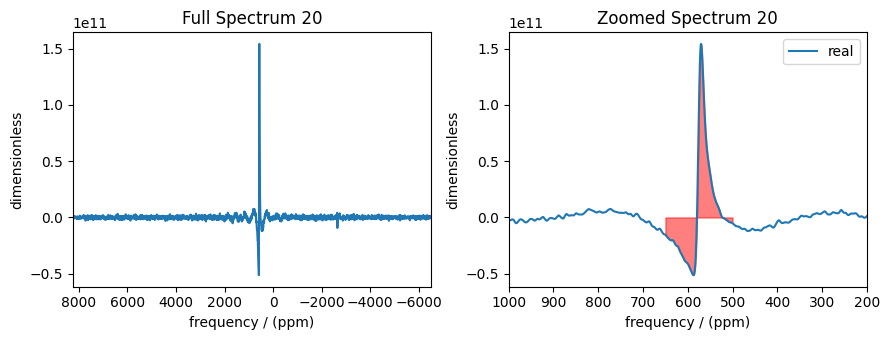

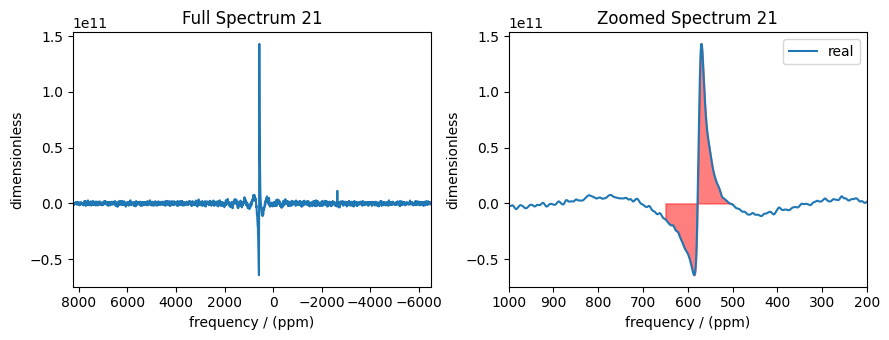

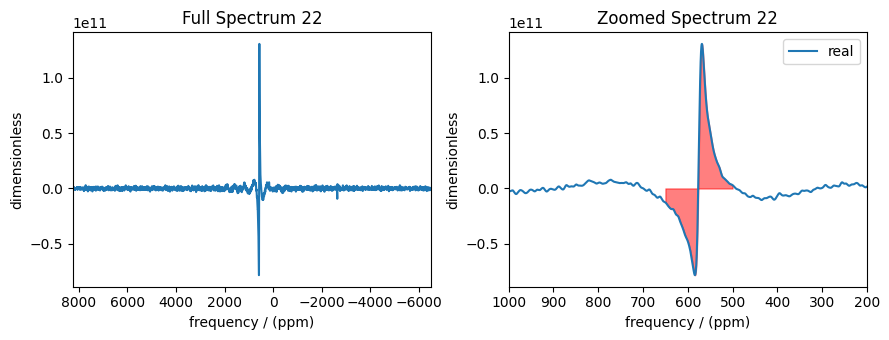

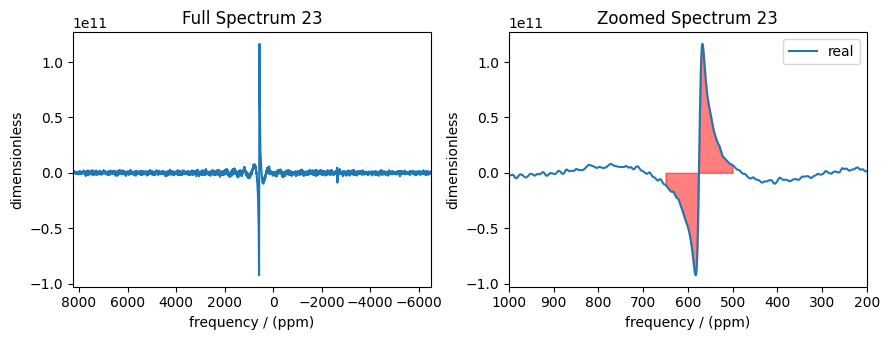

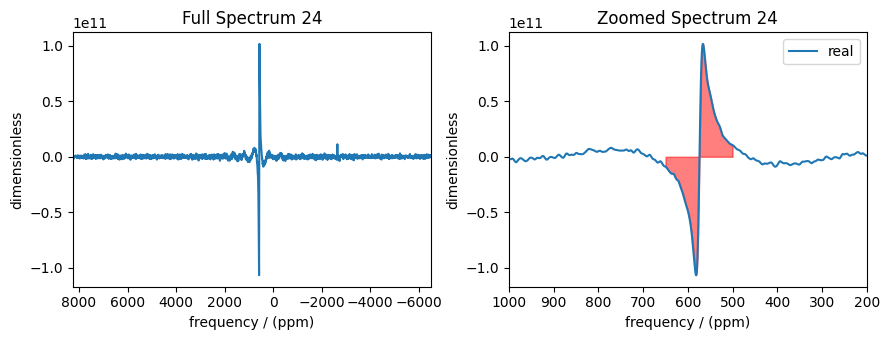

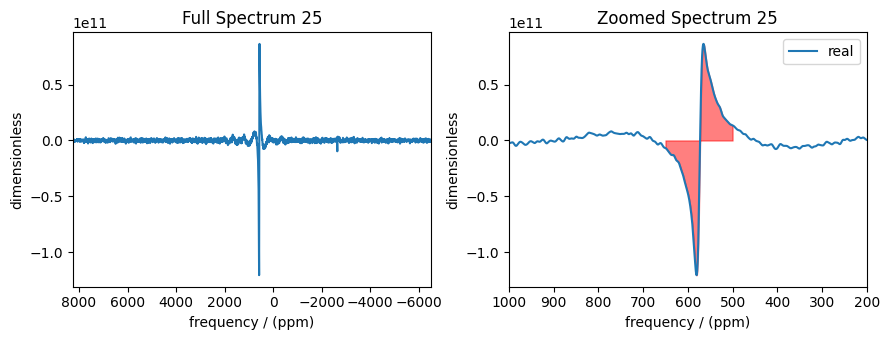

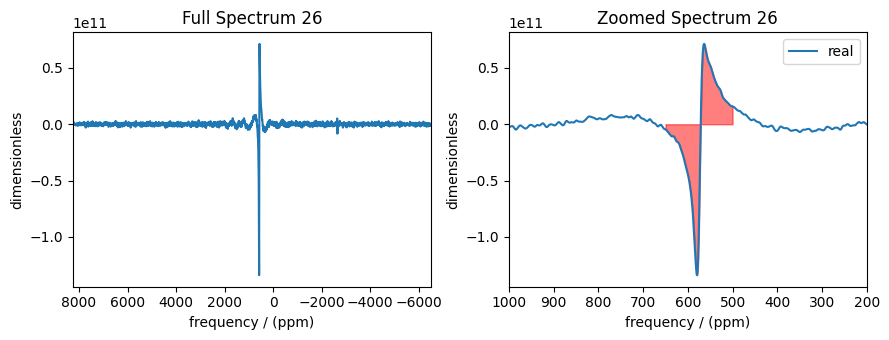

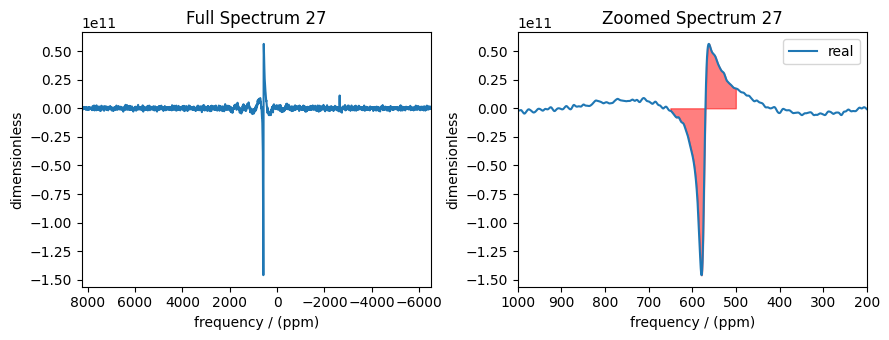

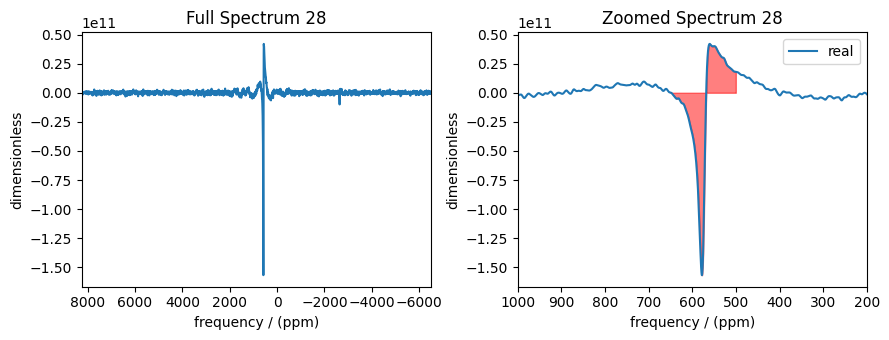

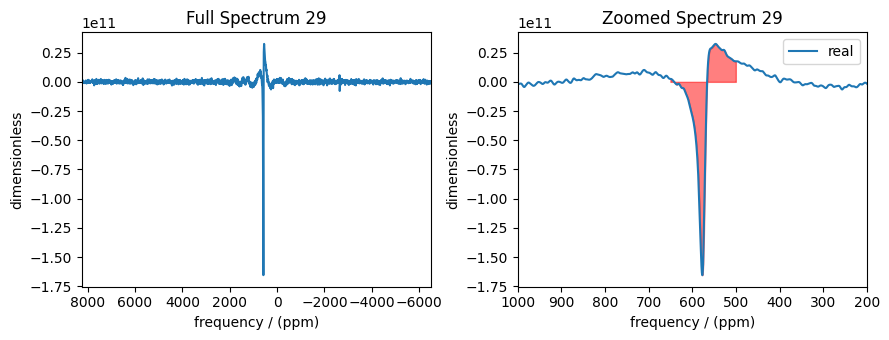

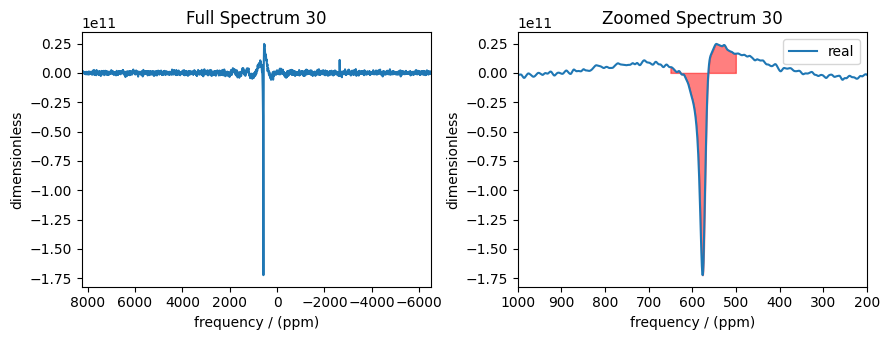

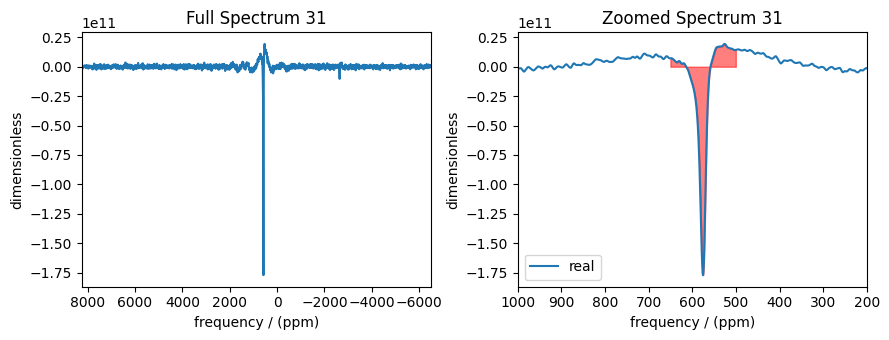

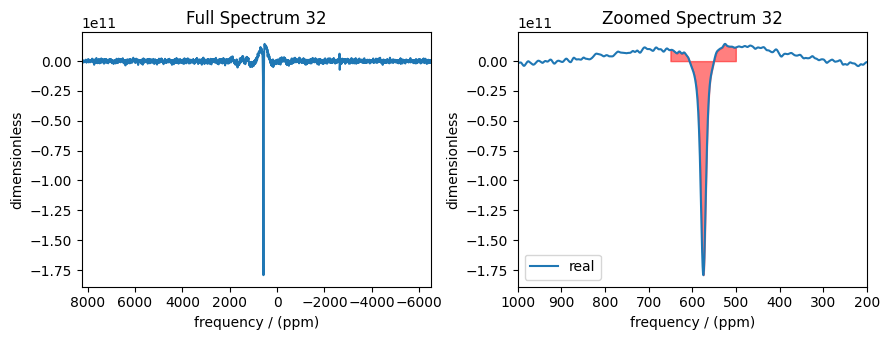

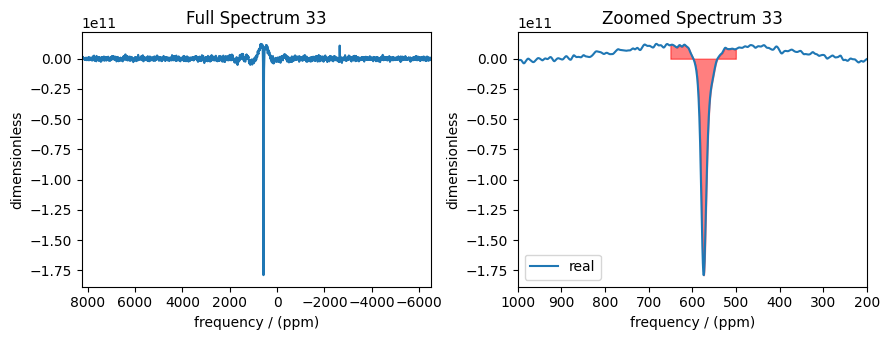

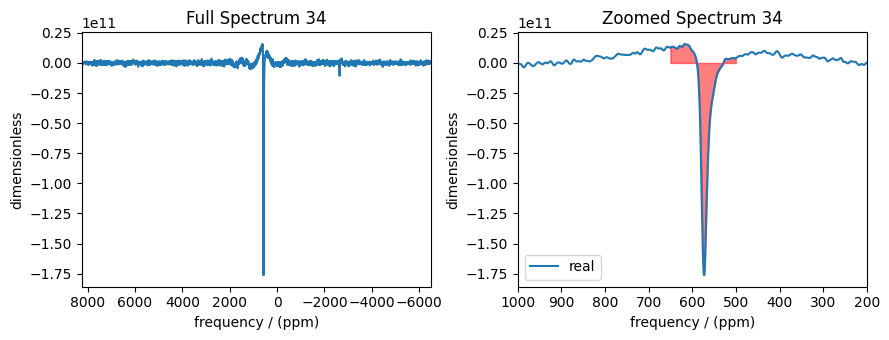

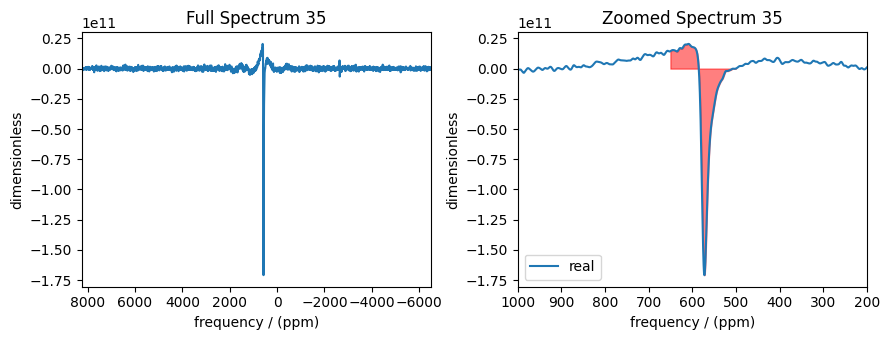

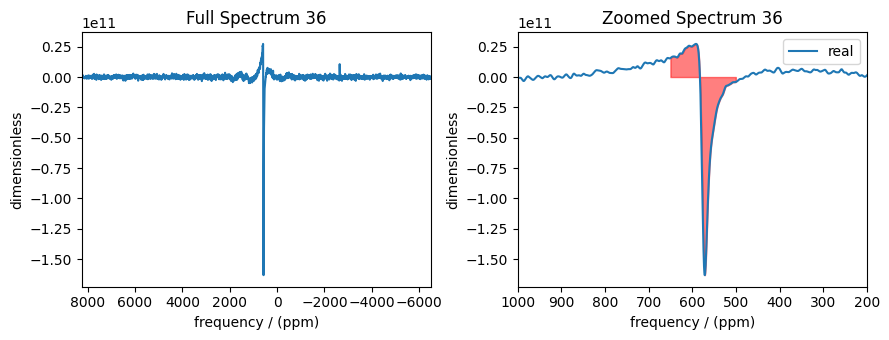

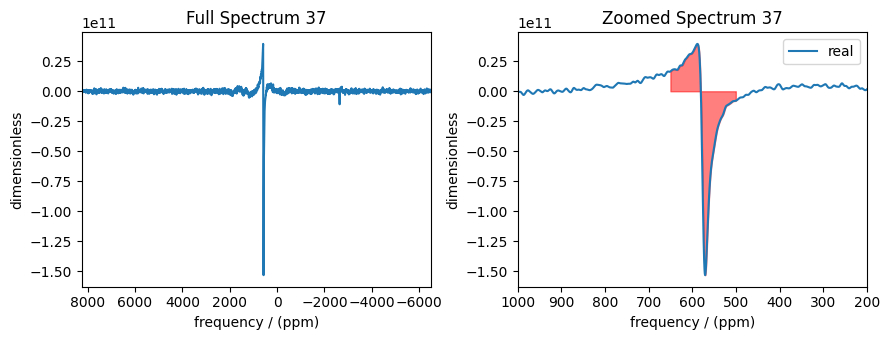

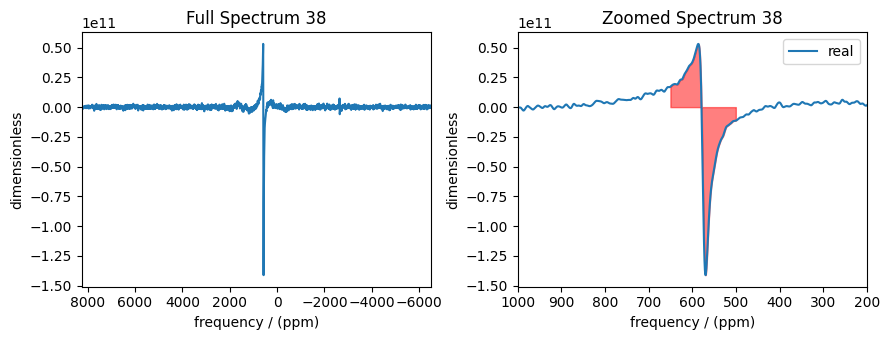

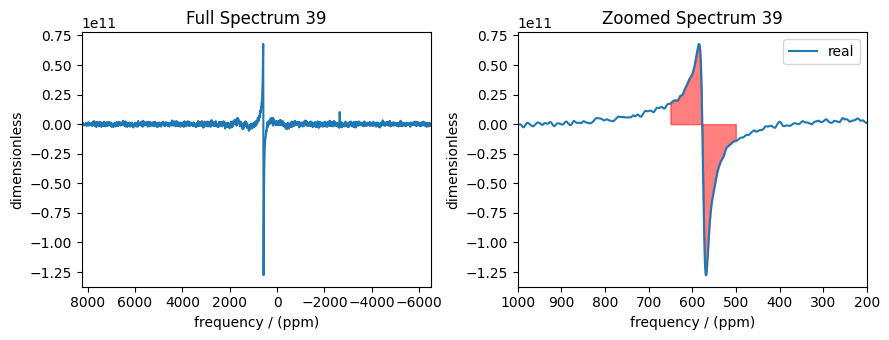

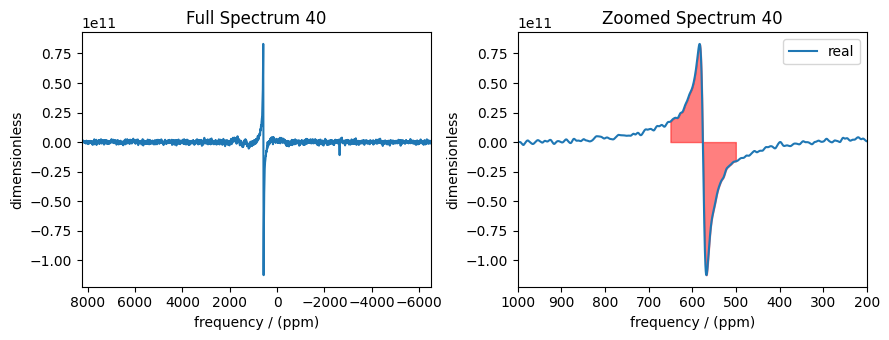

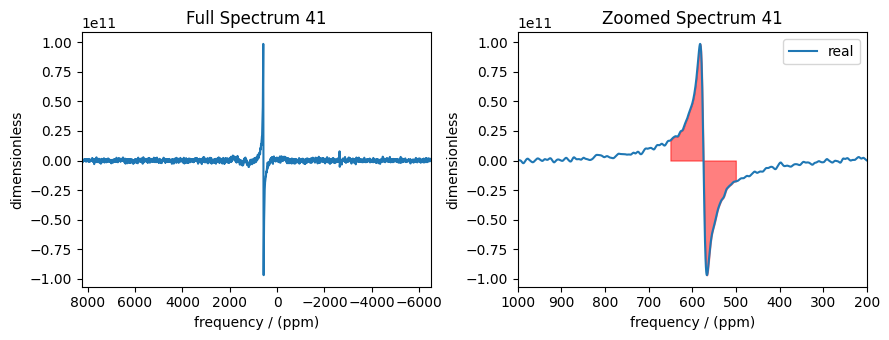

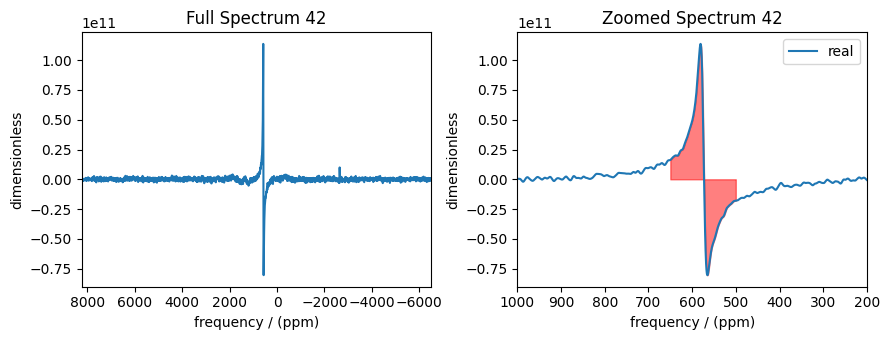

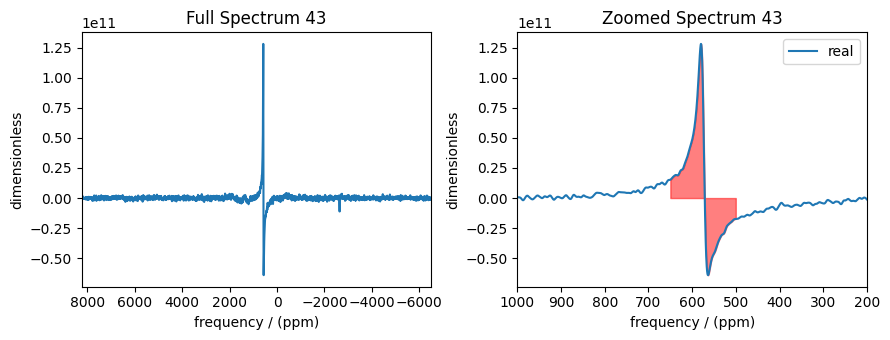

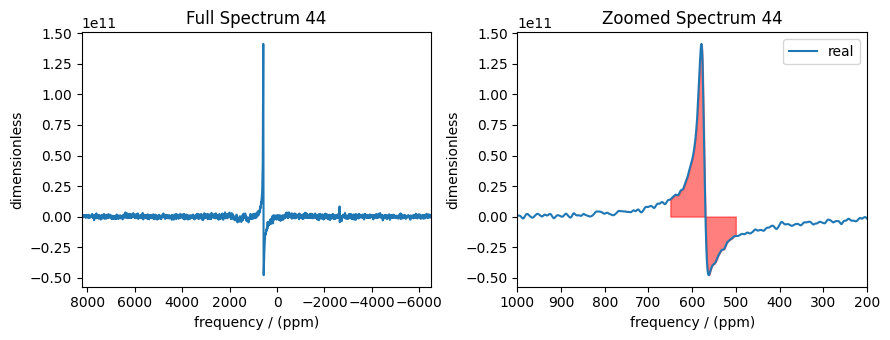

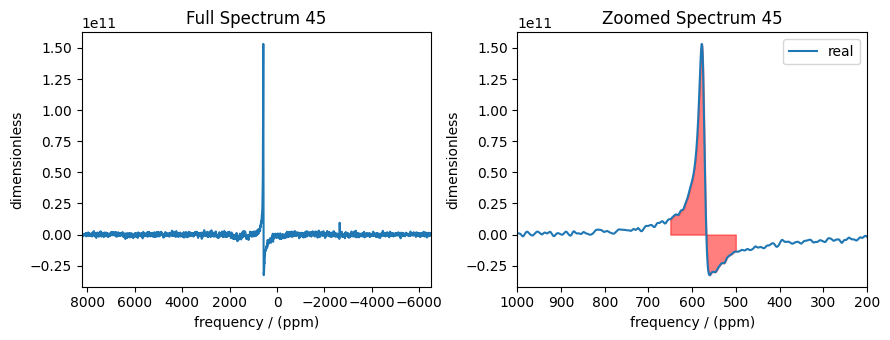

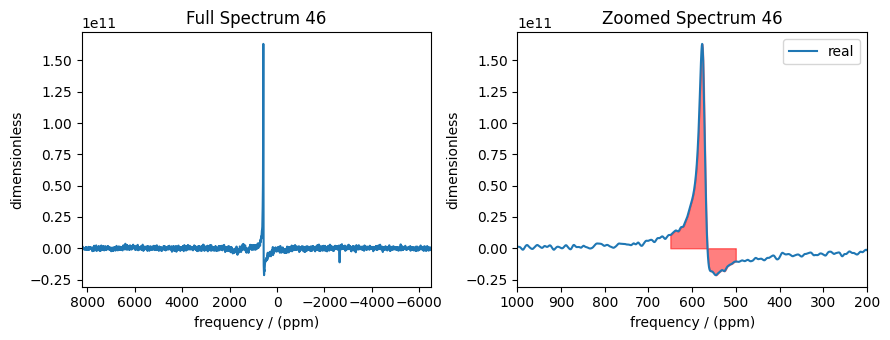

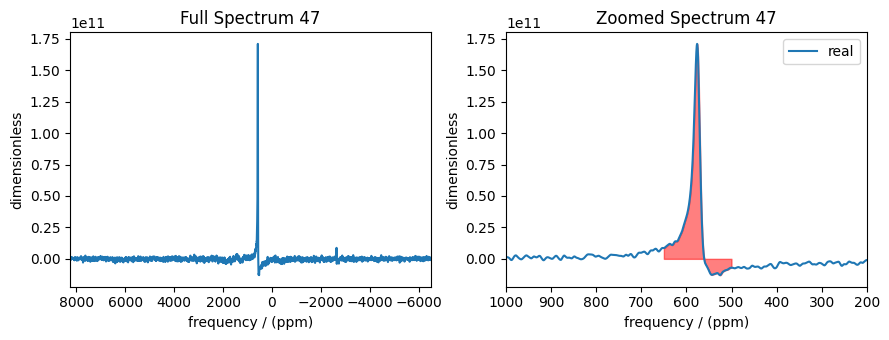

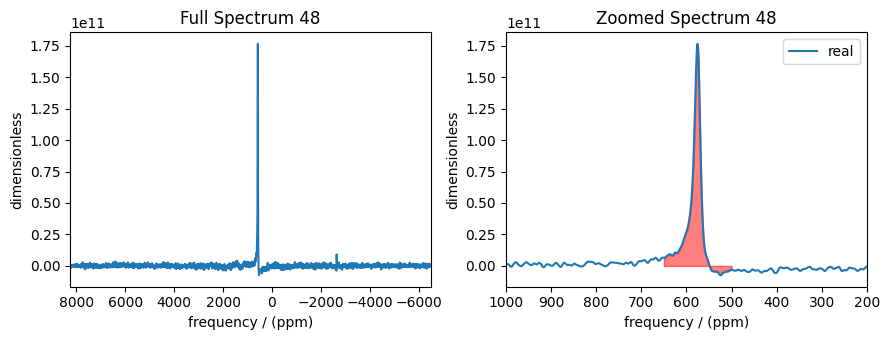

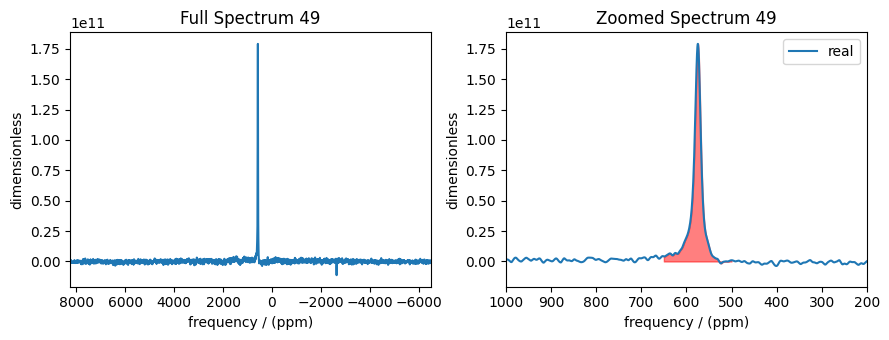

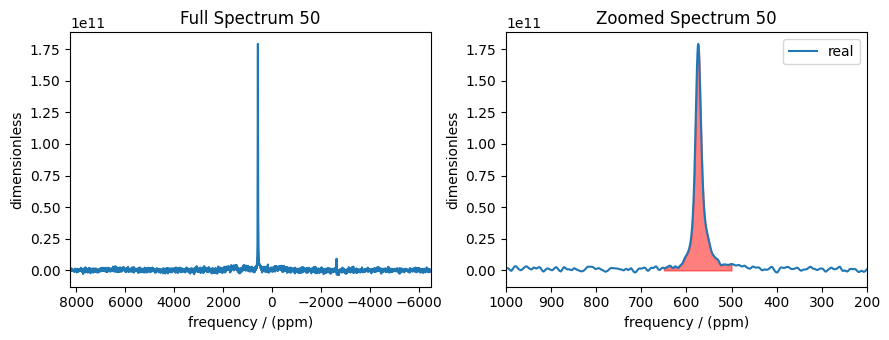

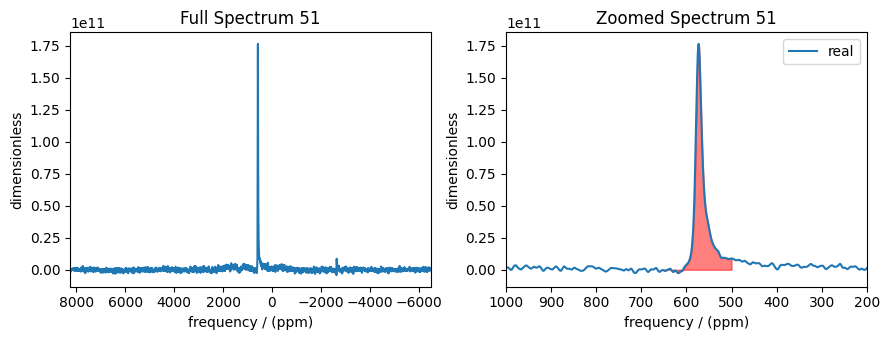

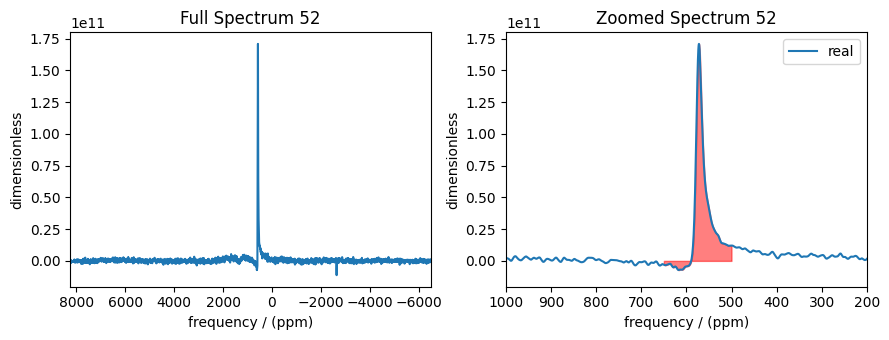

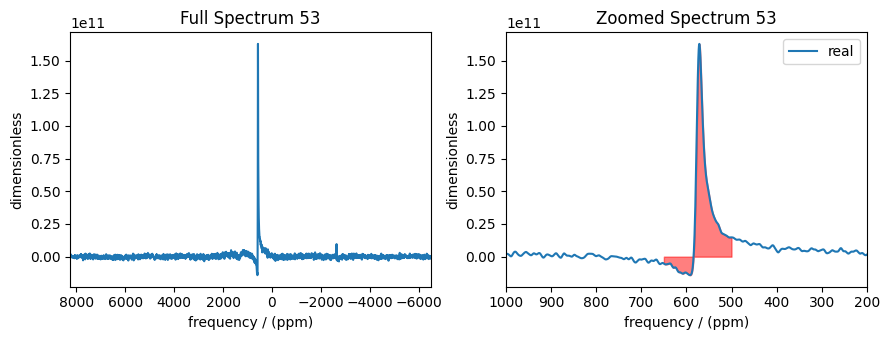

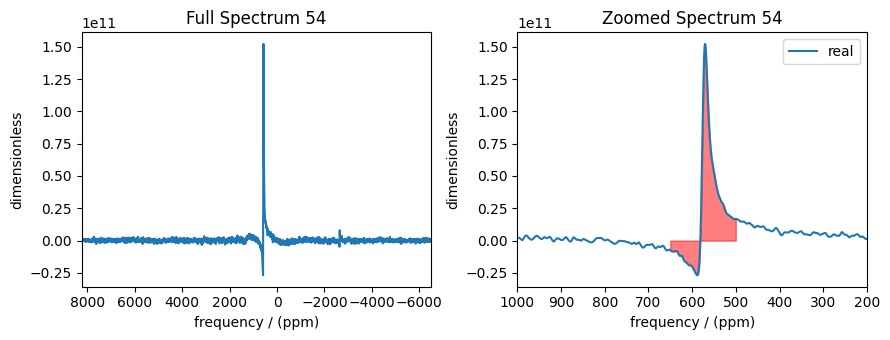

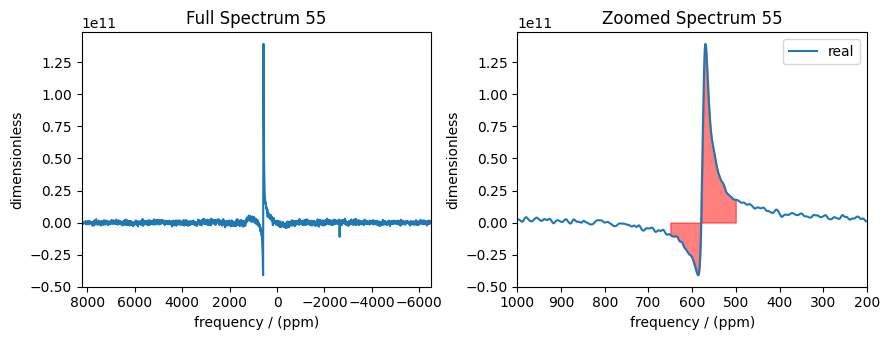

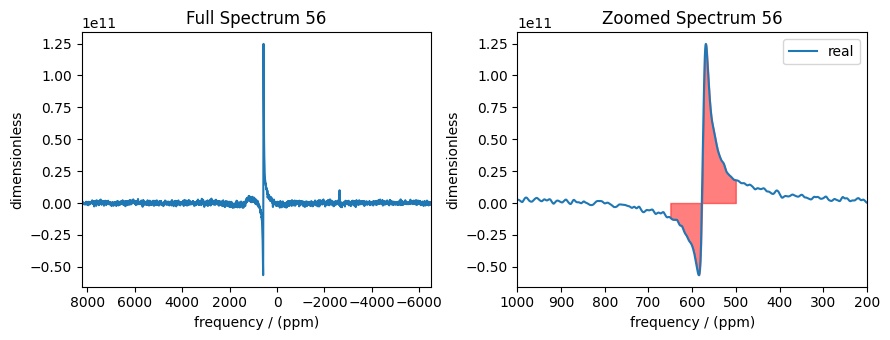

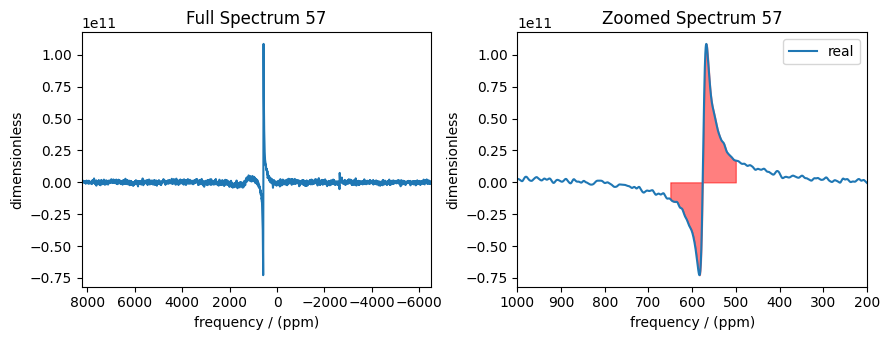

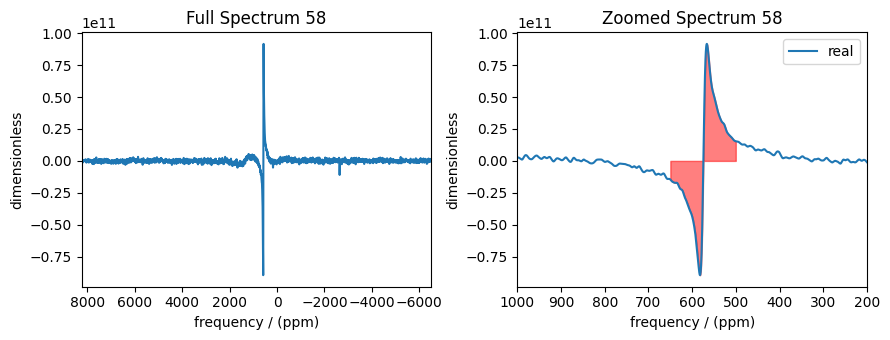

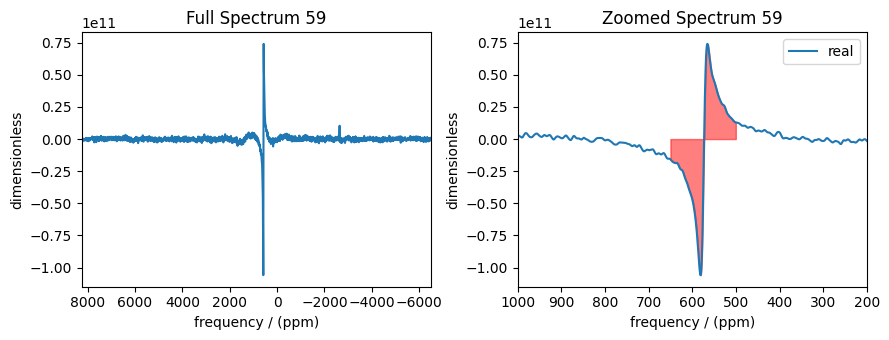

In [39]:
max_x_zoom = 1000

min_x_zoom = 200

abs_ints = t1.plot_spectra_and_zoomed_regions(phased_spectra, x_regions, y_regions, max_x_zoom, min_x_zoom)